In [1]:
# import the analysis and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
# load the dataset
insurance = pd.read_csv('insurance.csv')

In [5]:
# check the head of the dataset
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# check the info of the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# check a few statistics of the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0, 0.5, 'Num of people')

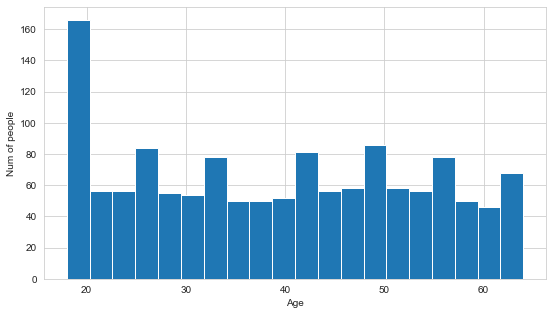

In [8]:
# visualise the number of people to their relative age groups as a histogram
plt.figure(figsize=(9,5))
plt.hist(insurance['age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Num of people')
# Shows the biggest age group category to be around 20

In [9]:
# People aged 18 and 19 were represented more than any other age by over a factor of 2.
insurance['age'].value_counts().head(5)

18    69
19    68
51    29
45    29
46    29
Name: age, dtype: int64

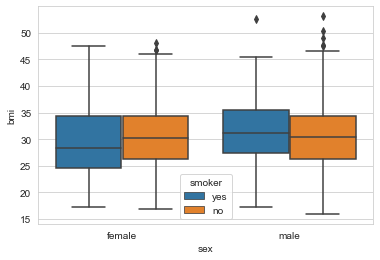

In [10]:
# Visualizing the bmi of each sex and seperating them into group of smokers and non smokers
sns.boxplot(data=insurance, x='sex',y='bmi',hue='smoker')

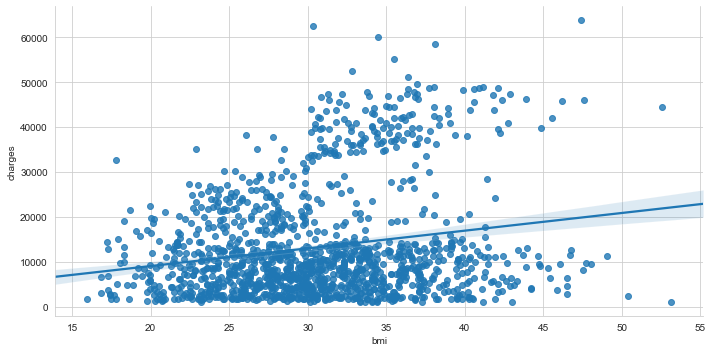

In [11]:
# Regression line indicating a small correlation between bmi and their medical costs
sns.lmplot(data=insurance,x='bmi',y='charges',aspect=2)

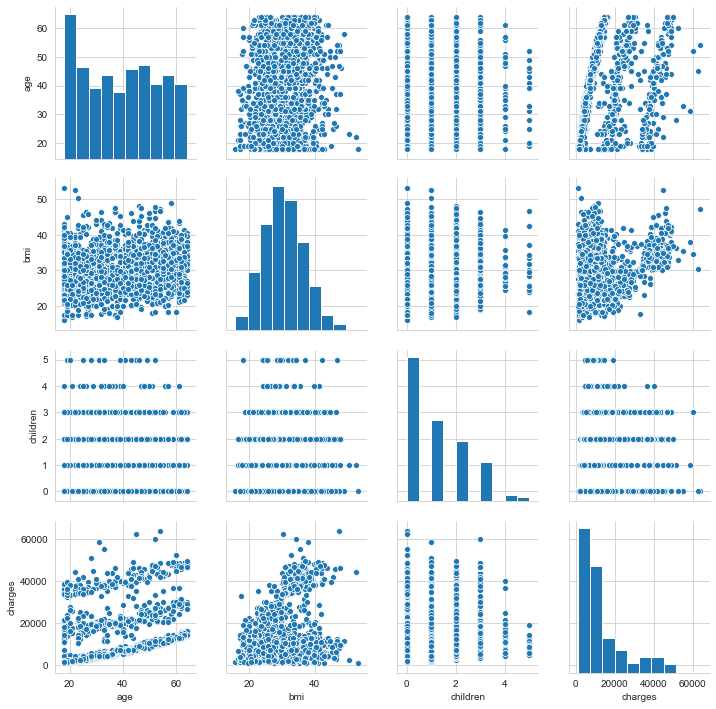

In [12]:
# Visualizing the relationship of all the features
sns.pairplot(insurance)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# Our aim is to predict the charges feature
# To create a better fit, we need to change the string variable into machine readable intergers.
insurance['sex'] = insurance['sex'].apply(lambda x : 1 if x=='male' else 0)

In [15]:
insurance.rename(columns={'sex':'male'},inplace=True)

In [16]:
insurance['smoker'] = insurance['smoker'].apply(lambda x : 1 if x=='yes' else 0)

In [17]:
regions = pd.get_dummies(insurance['region'],drop_first=True)

In [18]:
insurance_df = pd.concat([insurance,regions],axis=1)

In [19]:
insurance_df.drop('region',axis=1,inplace=True)

In [20]:
# We can now start splitting our data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(insurance_df.drop('charges',axis=1),insurance['charges'],test_size=0.33)

In [21]:
# Fit our training data to the our model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# Make the predictions using the X_test
predictions = model.predict(X_test)

In [23]:
# Let's check how well the model performed
from sklearn.metrics import mean_squared_error

In [24]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE: 6296.142808323856


(array([ 13.,  22.,  11.,  23.,  55., 103.,  86.,  37.,   3.,  10.,  34.,
         15.,   4.,   3.,   4.,   4.,   4.,   3.,   3.,   5.]),
 array([-11296.0665664 ,  -9547.38723829,  -7798.70791017,  -6050.02858206,
         -4301.34925394,  -2552.66992583,   -803.99059772,    944.6887304 ,
          2693.36805851,   4442.04738663,   6190.72671474,   7939.40604286,
          9688.08537097,  11436.76469909,  13185.4440272 ,  14934.12335532,
         16682.80268343,  18431.48201154,  20180.16133966,  21928.84066777,
         23677.51999589]),
 <a list of 20 Patch objects>)

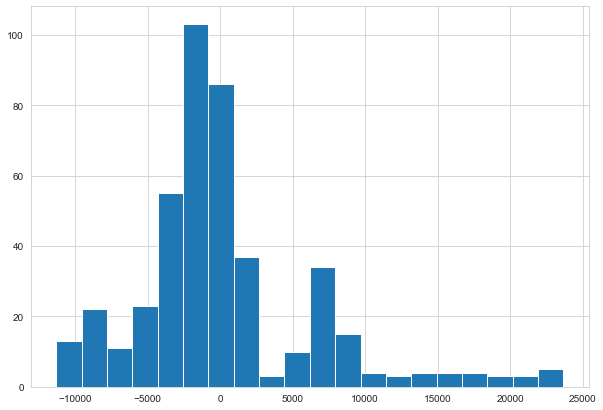

In [25]:
plt.figure(figsize=(10,7))
plt.hist(y_test-predictions,bins=20)

In [26]:
coef_df = pd.DataFrame(model.coef_,columns=['Coef'],index = ['age','male','bmi','children','smoker','northwest','southeast','southwest'])

In [27]:
coef_df

,Coef
age,249.594779
male,45.033712
bmi,333.604160
children,422.143481
smoker,23528.373107
northwest,20.858466
southeast,-405.239905
southwest,-456.063638
